In [42]:
import pandas as pd
from transformers import AutoTokenizer
from transformers import AutoModel
import matplotlib.pyplot as plt
import nltk
import string

In [43]:
df = pd.read_csv('./data/articles.csv')

df.head()

,Unnamed: 0,article,source,labels
0,0,"When I first started looking at oil assets, I ...",own_source_lessthan50,0.0
1,1,We look at two airlines that have given Wall S...,own_source_morethan50,0.0
2,2,Disney's Animal Kingdom theme park is staging ...,own_source_lessthan50,0.0
3,3,Why should you think otherwise? If the effort ...,own_source_lessthan50,0.0
4,4,"Chris Murphy, Carolyn Maloney and Doug Jones i...",own_source_lessthan50,0.0


In [44]:
real=df[df["labels"]==1.0]#[:100]
real.shape

(15050, 4)

In [45]:
fake=df[df["labels"]==0.0]#[:100]
fake.shape

(9944, 4)

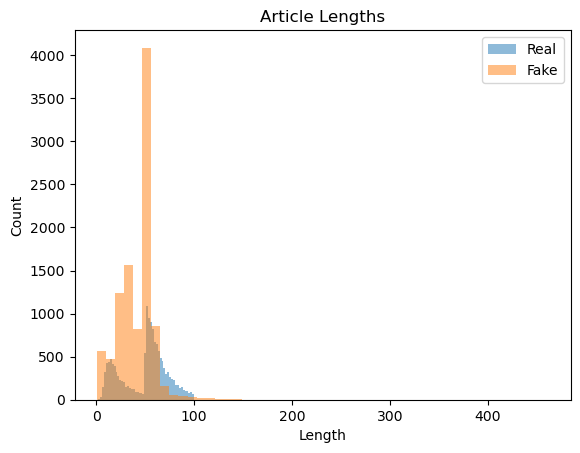

In [46]:
real_lengths = real['article'].apply(lambda x: len(nltk.sent_tokenize(x)))
fake_lengths = fake['article'].apply(lambda x: len(nltk.sent_tokenize(x)))
plt.hist(real_lengths, bins=50, alpha=0.5, label='Real')
plt.hist(fake_lengths, bins=50, alpha=0.5, label='Fake')

plt.title('Article Lengths')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()

In [47]:
fake_lengths

0       36
1       60
2       41
3       26
4       34
        ..
9939    50
9940    50
9941    50
9942    49
9943    50
Name: article, Length: 9944, dtype: int64

In [48]:
from collections import Counter
#downloading stopwords and punkt
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yarynakorduba/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yarynakorduba/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
def lookup_common_words(articles, num_words = 20):
    words = []
    stop_words = set(nltk.corpus.stopwords.words('english'))
    for article in articles:
        words.extend(nltk.word_tokenize(article.lower()))
    words = [word for word in words if word.isalpha() and word not in stop_words]
    word_counts = Counter(words)
    return word_counts.most_common(num_words)

In [18]:
real_words = lookup_common_words(real['article'])
fake_words = lookup_common_words(fake['article'])
print("Real common words: ", real_words, real.shape)
print("Fake common words: ", fake_words, fake.shape)

NameError: name 'lookup_common_words' is not defined

### Adding more features

In [53]:

def count_punctuation(column):
    count = 0
    punctuation = string.punctuation
    for token in punctuation:
        count += column["article"].count(token)
    return count

def count_sentences(column):
    return len(nltk.sent_tokenize(column["article"]))

def count_words(column):
    return len(column["preprocessed_article"].split())

def count_paragraphs(column):
    return ''

In [54]:
# # head_df =  pd.DataFrame(df.head())

# df["punctuation_count"] = df.apply(count_punctuation, axis=1)
# df["word_count"] = df.apply(count_words, axis=1)
# df["sentence_count"] = df.apply(count_sentences, axis=1)
# df["punctuation_percentage"] = df["punctuation_count"] / df["word_count"]
# df["average_words_in_sentence"] = df["word_count"] / df["sentence_count"]


KeyError: 'preprocessed_article'

In [23]:
# head_df

,Unnamed: 0,article,source,labels,punctuation_count,word_count,sentence_count
0,0,"When I first started looking at oil assets, I ...",own_source_lessthan50,0.0,99,574,36
1,1,We look at two airlines that have given Wall S...,own_source_morethan50,0.0,180,701,60
2,2,Disney's Animal Kingdom theme park is staging ...,own_source_lessthan50,0.0,141,730,41
3,3,Why should you think otherwise? If the effort ...,own_source_lessthan50,0.0,44,467,26
4,4,"Chris Murphy, Carolyn Maloney and Doug Jones i...",own_source_lessthan50,0.0,83,640,34


In [55]:
df

,Unnamed: 0,article,source,labels,punctuation_count
0,0,"When I first started looking at oil assets, I ...",own_source_lessthan50,0.0,99
1,1,We look at two airlines that have given Wall S...,own_source_morethan50,0.0,180
2,2,Disney's Animal Kingdom theme park is staging ...,own_source_lessthan50,0.0,141
3,3,Why should you think otherwise? If the effort ...,own_source_lessthan50,0.0,44
4,4,"Chris Murphy, Carolyn Maloney and Doug Jones i...",own_source_lessthan50,0.0,83
...,...,...,...,...,...
24989,4995,A FASCINATING video has illustrated the evolut...,read_text_lessthan50,1.0,75
24990,4996,"BUENA VISTA TWP, MI — Officials in Buena Vista...",read_text_lessthan50,1.0,37
24991,4997,Do you have several hours to kill while waitin...,read_text_lessthan50,1.0,141
24992,4998,A massive fire completely destroyed the roof a...,read_text_lessthan50,1.0,36


In [57]:
real_f = df[df['labels'] == 1]
fake_f = df[df['labels'] == 0]
real_plt = real_f["punctuation_percentage"].apply(lambda x: x)
fake_plt = fake_f["punctuation_percentage"].apply(lambda x: x)
plt.hist(real_plt, bins=100, alpha=0.5, label='Real')
plt.hist(fake_plt, bins=100, alpha=0.5, label='Fake')

plt.title('Punctuation percentage')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()

KeyError: 'punctuation_percentage'

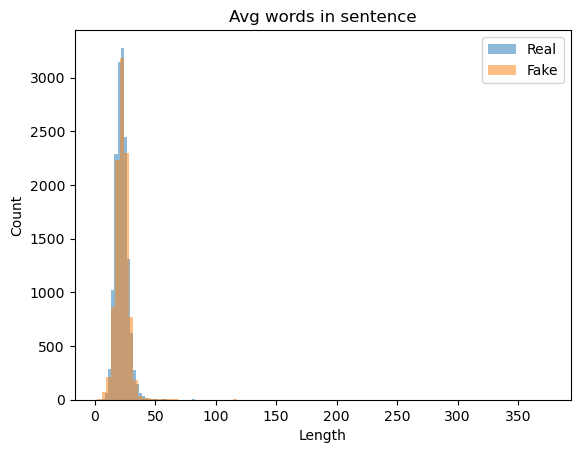

In [38]:
real_plt = real_f["average_words_in_sentence"].apply(lambda x: x)
fake_plt = fake_f["average_words_in_sentence"].apply(lambda x: x)
plt.hist(real_plt, bins=100, alpha=0.5, label='Real')
plt.hist(fake_plt, bins=100, alpha=0.5, label='Fake')

plt.title('Avg words in sentence')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()

# Text preprocessing

In [58]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
# large lexical database of English
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yarynakorduba/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [59]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [60]:
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation and digits
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    # Stem or lemmatize the words
    words = [stemmer.stem(word) for word in words]
   
        # Join the words back into a string
    text = ' '.join(words)

    return text

In [61]:
# real['article'] = real['article'].apply(preprocess_text)
# fake['article'] = fake['article'].apply(preprocess_text)

df["preprocessed_article"] = df["article"].apply(preprocess_text)

In [62]:
print(df)

       Unnamed: 0                                            article  \
0               0  When I first started looking at oil assets, I ...   
1               1  We look at two airlines that have given Wall S...   
2               2  Disney's Animal Kingdom theme park is staging ...   
3               3  Why should you think otherwise? If the effort ...   
4               4  Chris Murphy, Carolyn Maloney and Doug Jones i...   
...           ...                                                ...   
24989        4995  A FASCINATING video has illustrated the evolut...   
24990        4996  BUENA VISTA TWP, MI — Officials in Buena Vista...   
24991        4997  Do you have several hours to kill while waitin...   
24992        4998  A massive fire completely destroyed the roof a...   
24993        4999  This story is part of Fast Company‘s Gender Pa...   

                      source  labels  punctuation_count  \
0      own_source_lessthan50     0.0                 99   
1      own_source

In [71]:

def count_punctuation(column):
    count = 0
    punctuation = string.punctuation
    for token in punctuation:
        count += column["article"].count(token)
    return count

def count_commas(column):
    count = 0
    punctuation = ","
    for token in punctuation:
        count += column["article"].count(token)
    return count

def count_sentences(column):
    return len(nltk.sent_tokenize(column["article"]))

def count_words(column):
    return len(column["preprocessed_article"].split())

def count_paragraphs(column):
    return ''

In [79]:
# head_df =  pd.DataFrame(df.head())

df["punctuation_count"] = df.apply(count_punctuation, axis=1)
df["comma_count"] = df.apply(count_commas, axis=1)
df["word_count"] = df.apply(count_words, axis=1)
df["sentence_count"] = df.apply(count_sentences, axis=1)
df["punctuation_percentage"] = df["punctuation_count"] / df["word_count"]
df["comma_percentage"] = df["comma_count"] / df["word_count"]

df["average_words_in_sentence"] = df["word_count"] / df["sentence_count"]


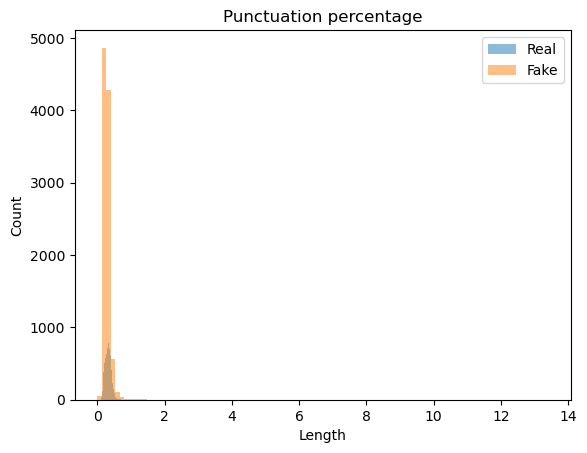

Punctuation percentage in real data:  0.32082237397385827
Punctuation percentage in generated data:  0.28787655940454815


In [80]:
real_f = df[df['labels'] == 1]
fake_f = df[df['labels'] == 0]
real_plt = real_f["punctuation_percentage"].apply(lambda x: x)
fake_plt = fake_f["punctuation_percentage"].apply(lambda x: x)
plt.hist(real_plt, bins=100, alpha=0.5, label='Real')
plt.hist(fake_plt, bins=100, alpha=0.5, label='Fake')

plt.title('Punctuation percentage')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()

avg_real = real_f["punctuation_percentage"].mean()
avg_fake = fake_f["punctuation_percentage"].mean()

print("Punctuation percentage in real data: ", avg_real)
print("Punctuation percentage in generated data: ", avg_fake)



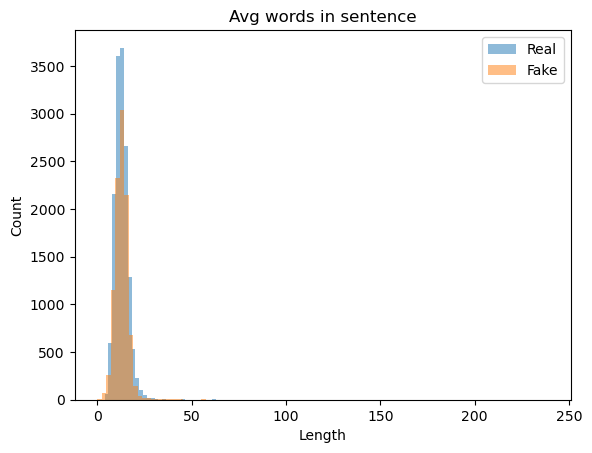

Average words per sentence in real data:  12.976381078543126
Average words per sentence in generated data:  13.007233414848331


In [76]:
real_plt = real_f["average_words_in_sentence"].apply(lambda x: x)
fake_plt = fake_f["average_words_in_sentence"].apply(lambda x: x)
plt.hist(real_plt, bins=100, alpha=0.5, label='Real')
plt.hist(fake_plt, bins=100, alpha=0.5, label='Fake')

plt.title('Avg words in sentence')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()

avg_real = real_f["average_words_in_sentence"].mean()
avg_fake = fake_f["average_words_in_sentence"].mean()

print("Average words per sentence in real data: ", avg_real)
print("Average words per sentence in generated data: ", avg_fake)

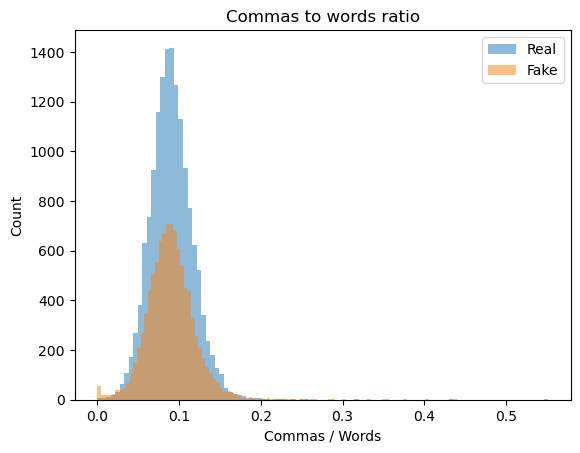

Average commas to words in real data:  0.09062055202468125
Average commas to words in generated data:  0.08961316633602567


In [81]:
real_plt = real_f["comma_percentage"].apply(lambda x: x)
fake_plt = fake_f["comma_percentage"].apply(lambda x: x)
plt.hist(real_plt, bins=100, alpha=0.5, label='Real')
plt.hist(fake_plt, bins=100, alpha=0.5, label='Fake')

plt.title('Commas to words ratio')
plt.xlabel('Commas / Words')
plt.ylabel('Count')
plt.legend()
plt.show()

avg_real = real_f["comma_percentage"].mean()
avg_fake = fake_f["comma_percentage"].mean()

print("Average commas to words in real data: ", avg_real)
print("Average commas to words in generated data: ", avg_fake)

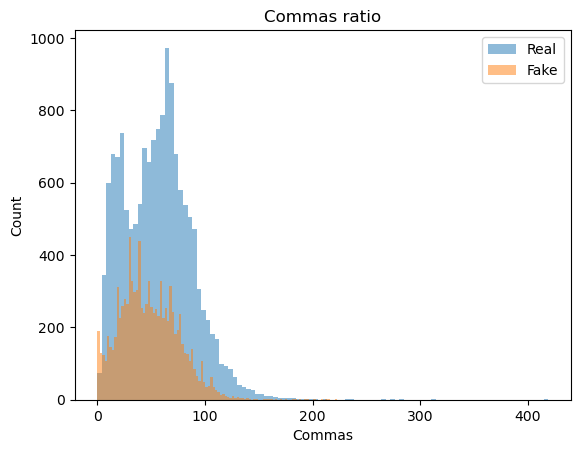

Average commas in real data:  56.08571428571429
Average commas in generated data:  48.36645213193886


In [82]:
real_plt = real_f["comma_count"].apply(lambda x: x)
fake_plt = fake_f["comma_count"].apply(lambda x: x)
plt.hist(real_plt, bins=100, alpha=0.5, label='Real')
plt.hist(fake_plt, bins=100, alpha=0.5, label='Fake')

plt.title('Commas ratio')
plt.xlabel('Commas')
plt.ylabel('Count')
plt.legend()
plt.show()

avg_real = real_f["comma_count"].mean()
avg_fake = fake_f["comma_count"].mean()

print("Average commas in real data: ", avg_real)
print("Average commas in generated data: ", avg_fake)

In [104]:
real_f = df[df['labels'] == 1]
fake_f = df[df['labels'] == 0]
r_f = real_f[real_f['sentence_count'] == 50]
f_f = fake_f[fake_f['sentence_count'] == 50 ]

print(r_f.shape, f_f.shape)

real_9000 = r_f["comma_count"][:540]
fake_9000 = f_f["comma_count"][:540]

print(real_9000.shape, fake_9000.shape)

sum_real_9000 = real_9000.sum()
sum_fake_9000 = fake_9000.sum()

avg_real_9000 = sum_real_9000 / (sum_real_9000 + sum_fake_9000)
avg_fake_9000 = sum_fake_9000 / (sum_real_9000 + sum_fake_9000)

print("Commas in real data (in total 9000 records) / Commas in all data: ", avg_real_9000)
print("Commas in fake data (in total 9000 records) / Commas in all data: ", avg_fake_9000)

(540, 12) (1970, 12)
(540,) (540,)
Commas in real data (in total 9000 records) / Commas in all data:  0.4722603808929129
Commas in fake data (in total 9000 records) / Commas in all data:  0.5277396191070871


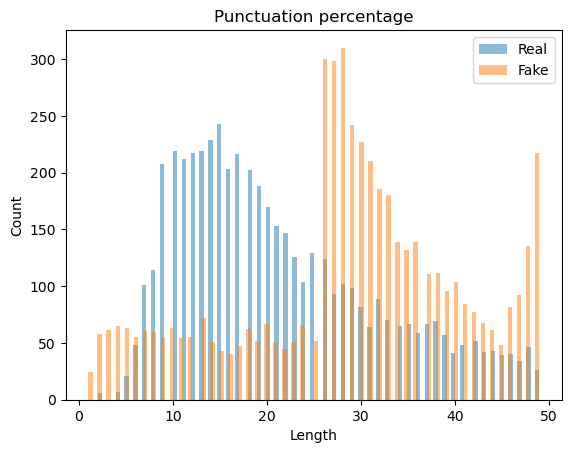

Sentences in real data:  21.313262652530508 21.313262652530508
Sentences in generated data:  28.838908801274393 28.838908801274393


In [86]:
real_f = df[df['labels'] == 1]
fake_f = df[df['labels'] == 0]
r_f = real_f[real_f['sentence_count'] < 50]
f_f = fake_f[fake_f['sentence_count'] < 50]

real_plt = r_f["sentence_count"].apply(lambda x: x)
fake_plt = f_f["sentence_count"].apply(lambda x: x)
plt.hist(real_plt, bins=100, alpha=0.5, label='Real')
plt.hist(fake_plt, bins=100, alpha=0.5, label='Fake')

plt.title('Punctuation percentage')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()

avg_real = r_f["sentence_count"].mean()
avg_fake = f_f["sentence_count"].mean()

print("Sentences in real data: ", avg_real, avg_real.mean())
print("Sentences in generated data: ", avg_fake, avg_fake.mean())


# Model Training

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse as sp
import numpy as np

In [49]:
vectorizer = CountVectorizer()
X_real = vectorizer.fit_transform(real['article'])
X_fake = vectorizer.transform(fake['article'])

In [50]:
X = sp.vstack([X_real, X_fake])
y = np.concatenate([np.ones(X_real.shape[0]), np.zeros(X_fake.shape[0])])

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42, max_iter=100)
clf.fit(X_train, y_train)

/Users/yarynakorduba/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

____

# Model Evaluation

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.8581716343268654
Precision: 0.6565961732124874
Recall: 0.6392156862745098
F1 Score: 0.6477893691008445


___

In [12]:
# Checking for null values
df.isnull().sum()

article    0
source     0
labels     0
dtype: int64

In [ ]:
x_df = df['text'] # features
y_df = df['is_generated'] # targets

In [ ]:
pretrained_model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name)
model = AutoModel.from_pretrained(pretrained_model_name)

In [ ]:
x_df

In [ ]:
train_idx = [i for i in range(len(x_df.index))]
train_idx

In [ ]:
x_train = x_df.values
len(x_train)

In [ ]:
# tokenized_x = tokenizer.encode('Blablabla')
# tokenized_x

In [ ]:
input_ids = [
    tokenizer.encode(txt, add_special_tokens=True,pad_to_max_length=True) for txt in x_train
]

In [ ]:
input_ids
len(input_ids)

In [ ]:
len(input_ids[0])

In [ ]:
# print( tokenizer.convert_ids_to_tokens( input_ids[0] ) )
